In [8]:
import os
import pandas as pd
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# set the path to the parent folder containing the 10 folders
directory="C:/Users/c0070810/OneDrive - Newcastle University/Trial resilience graph June 2024/resilience graph/shieldhall_rainfall/base_results"
#files = glob.glob("*.pkl")
#files.sort(key=os.path.getmtime)
#print("\n".join(files))

In [2]:
total_days= 60
BODp = 0.7

CODp = 0.75
rainmax = []
data = []
c= []
rain_duration=[]
norain_duration=[]
#c_back=[]

In [17]:
for filename in os.listdir(directory):
    if filename.endswith(".pkl"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "rb") as f:
            data = pickle.load(f)
            l = max(data['rainfall91'])
            rainmax.append(l)
            data['BODut'] = ((50 - data["bod31"].min()) / (data["bod1"].max() - data["bod31"].min()))
            data['BODlt'] = ((25 - data["bod31"].min()) / (data["bod1"].max() - data["bod31"].min()))

            data['CODut'] = ((250 - data["cod31"].min()) / (data["cod1"].max() - data["cod31"].min()))
            data['CODlt'] = ((125 - data["cod31"].min()) / (data["cod1"].max() - data["cod31"].min()))

            data["LIN_BODe"] = (data.bod31 - data["bod31"].min()) / (data["bod1"].max() - data["bod31"].min())
            data["LIN_CODe"] = (data.cod31 - data["cod31"].min()) / (data["cod1"].max() - data["cod31"].min())
            data["LIN_BODi"] = (data.bod1 - data["bod31"].min()) / (data["bod1"].max() - data["bod31"].min())
            data["LIN_CODi"] = (data.cod1 - data["cod31"].min()) / (data["cod1"].max() - data["cod31"].min())

            data['BODut-BODeffl'] = (data.BODut - data["LIN_BODe"])
            data['CODut-CODeffl'] = (data.CODut - data["LIN_CODe"])

            data['BODlt-BODeffl'] = (data.BODlt - data["LIN_BODe"])
            data['CODlt-CODeffl'] = (data.CODlt - data["LIN_CODe"])

            data["%bod"]=-(BODp* data.LIN_BODi) + data.LIN_BODi - data.LIN_BODe
            data["%cod"]=-(CODp* data.LIN_CODi) + data.LIN_CODi - data.LIN_CODe

            data["max1"] = data[['BODlt-BODeffl','%bod']].max(axis=1)
            data['c_BOD'] = data[['BODut-BODeffl', 'max1']].min(axis=1)
            data["max2"] = data[['CODlt-CODeffl','%cod']].max(axis=1)
            data['c_COD'] = data[['CODut-CODeffl', 'max2']].min(axis=1)


            data["LIN_C"] = data[['c_BOD', 'c_COD']].min(axis=1)

            c.append(data["LIN_C"].min())
            d = (sum(1 for r in data['rainfall91'] if r > 0))*0.05
            rain_duration.append(d)
            non_rain_duration = total_days - d
            norain_duration.append(non_rain_duration)
            #c_back.append(data["MIN_C_BACK"].min())



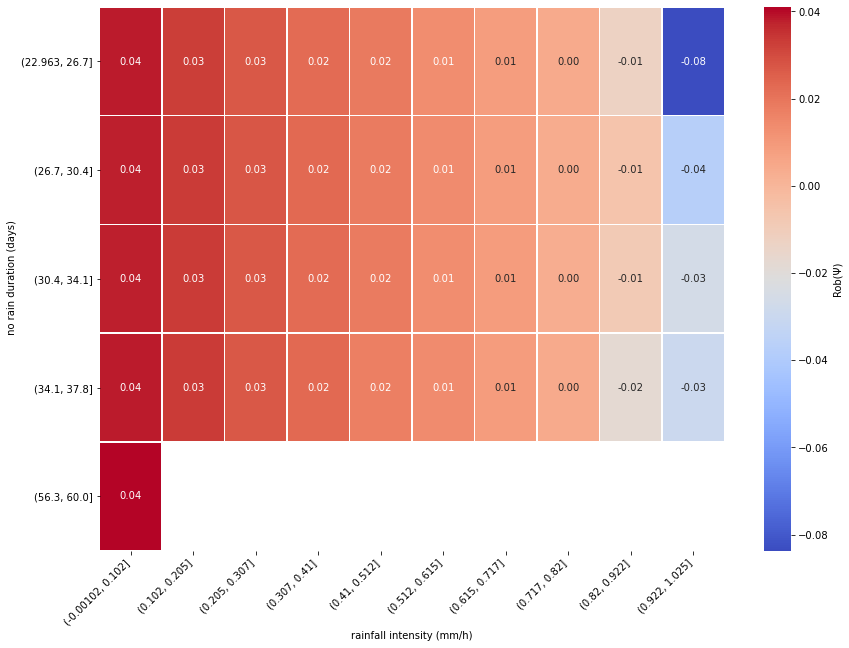

In [20]:
# Create a DataFrame from the lists
df1 = pd.DataFrame({
    'rainmax': rainmax,
    'norain_duration': norain_duration,
    'c': c
})

# Bin the data to reduce the number of unique values for better visualization
df1['rainmax_bin'] = pd.cut(df1['rainmax'], bins=10)
df1['norain_duration_bin'] = pd.cut(df1['norain_duration'], bins=10)

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(df1, values='c', index='norain_duration_bin', columns='rainmax_bin', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Rob(Ψ)'}, fmt=".2f", linewidths=.5)

#plt.title('Heatmap' )
plt.xlabel('rainfall intensity (mm/h)')
plt.ylabel(' no rain duration (days)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

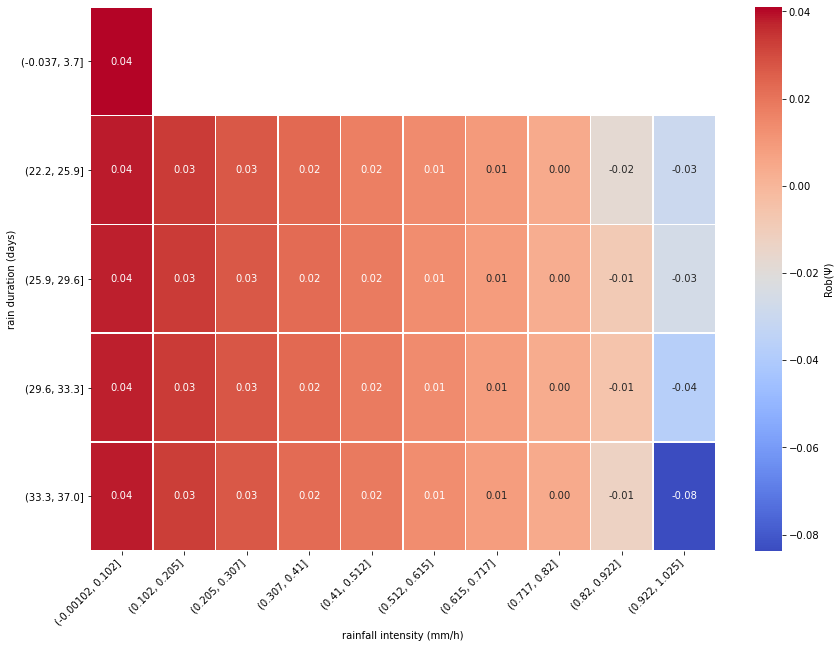

In [13]:
# Create a DataFrame from the lists
df = pd.DataFrame({
    'rainmax': rainmax,
    'rain_duration': rain_duration,
    'c': c
})

# Bin the data to reduce the number of unique values for better visualization
df['rainmax_bin'] = pd.cut(df['rainmax'], bins=10)
df['rain_duration_bin'] = pd.cut(df['rain_duration'], bins=10)

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(df, values='c', index='rain_duration_bin', columns='rainmax_bin', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Rob(Ψ)'}, fmt=".2f", linewidths=.5)

#plt.title('Heatmap' )
plt.xlabel('rainfall intensity (mm/h)')
plt.ylabel('rain duration (days)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

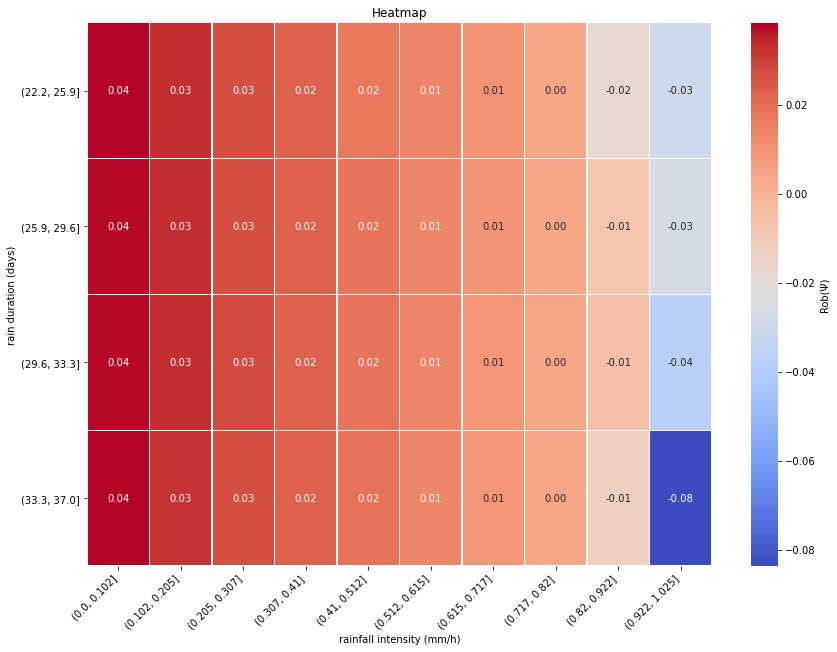

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the lists
df = pd.DataFrame({
    'rainmax': rainmax,
    'rain_duration': rain_duration,
    'c': c
})

# Define bin edges that start from 0
rainmax_bins = np.linspace(0, df['rainmax'].max(), 11)
rain_duration_bins = np.linspace(0, df['rain_duration'].max(), 11)

# Bin the data using the specified bin edges
df['rainmax_bin'] = pd.cut(df['rainmax'], bins=rainmax_bins)
df['rain_duration_bin'] = pd.cut(df['rain_duration'], bins=rain_duration_bins)

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(df, values='c', index='rain_duration_bin', columns='rainmax_bin', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Rob(Ψ)'}, fmt=".2f", linewidths=.5)

plt.title('Heatmap')
plt.xlabel('rainfall intensity (mm/h)')
plt.ylabel('rain duration (days)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()
